In [1]:
# # # Liver Disease Prediction- Not removing duplicates but removing outliers (Logistic Rergression)

In [2]:
# Import all required libraries for reading data, analysing and visualizing data to perform data pre-proccessing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [7]:
# # # Data Pre-Proccessing

In [8]:
# # Data Analysis

In [9]:
# Read the training & test data by loading the dataset

In [10]:
liver_df = pd.read_csv("patients.csv")

In [11]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [12]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
liver_df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [14]:
# given in the website 416 liver disease patients and 167 non liver disease patients
# 2- non liver patient and 1 is liver patient 

In [15]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [16]:
# Checking for null values in the dataset

In [17]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
# Here is the observation from the dataset:   
# 1) Only gender is non-numeric veriable. All others are numeric.   
# 2) There are 10 features and 1 output - dataset.   
# 3) In Albumin and Globulin ration we can see four missing values

In [19]:
liver_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [20]:
# Here we get a clear idea of 416 patients who have liver disease represented as 1 and 167 patients who do not have are represented by 2

In [21]:
# Let us first fill in the null values of the dataset rather than dropping the whole row

In [22]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [23]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [24]:
# Clearly shows 4 null values 

In [25]:
# We will now take the mean of Albumin and Globulin ratio and fill them in the null values 

In [26]:
liver_df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [27]:
liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [28]:
# Thus the null values have been filled and can be checked

In [29]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [30]:
liver_df['Albumin_and_Globulin_Ratio']=liver_df['Albumin_and_Globulin_Ratio'].astype('float')
liver_df['Albumin']=liver_df['Albumin'].astype('float')
liver_df['Total_Protiens']=liver_df['Total_Protiens'].astype('float')

In [31]:
# By the information we can see that there are no null values 

In [32]:
# # Data Cleaning 

In [33]:
# Let us check for duplicate values and rows in the dataset 

In [34]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31  

In [35]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='last')]
print("Duplicate Rows except last occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except last occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
18    40  Female              0.9               0.3                   293   
25    34    Male              4.1               2.0                   289   
33    38  Female              2.6               1.2                   410   
54    42    Male              8.9               4.5                   272   
61    58    Male              1.0               0.5                   158   
105   36    Male              5.3               2.3                   145   
107   36    Male              0.8               0.2                   158   
137   18    Male              0.8               0.2                   282   
142   30    Male              1.6               0.4                   332   
157   72    Male              0.7               0.1                   196   
163   39    Male              1.9               0.9                   180   
173   31   

In [36]:
liver_df.shape # These are the total rows and columns in the dataset

(583, 11)

In [37]:
# Let us now check for outliers in the datasets and try correcting them 

In [38]:
# # Removing Outliers and seeing for each column

In [39]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [40]:
# # Distribution of Numerical Features

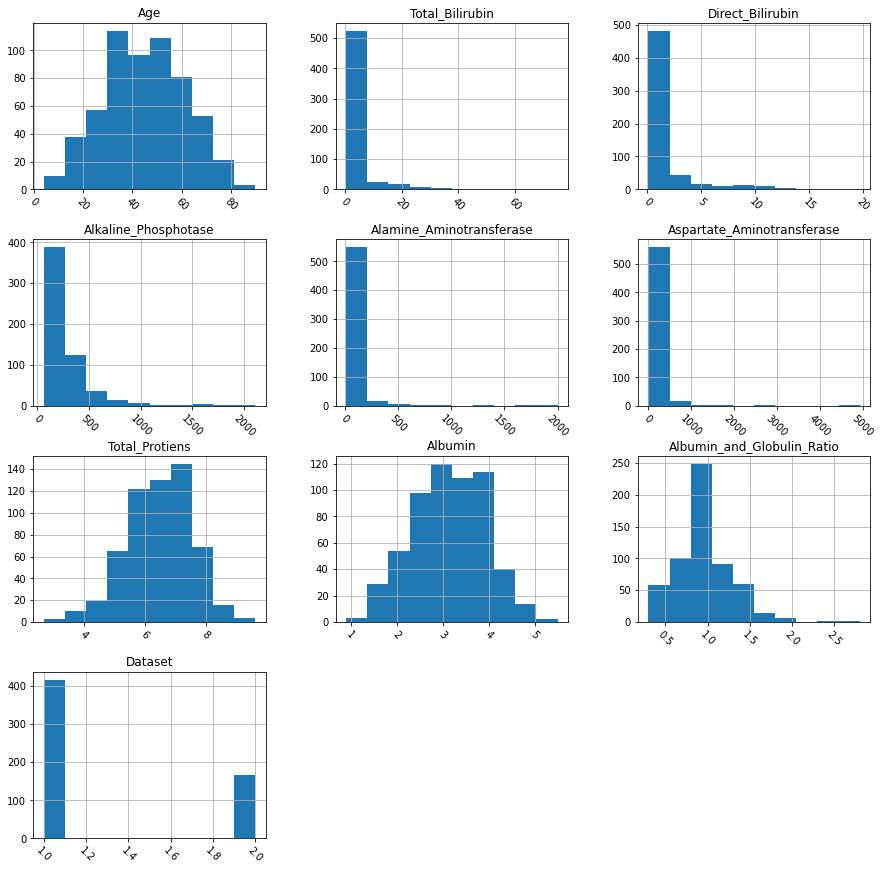

In [41]:
# Plot histogram grid
liver_df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [42]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [43]:
# It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

In [44]:
# Thus let us try eliminating outliers

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Bilirubin'>

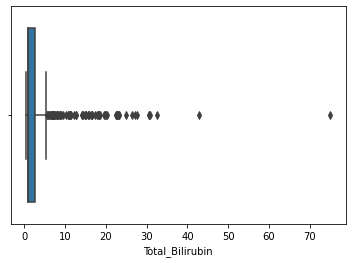

In [45]:
sns.boxplot(liver_df.Total_Bilirubin)

In [46]:
liver_df.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
259    30.5
Name: Total_Bilirubin, dtype: float64

In [47]:
# These outliers values will not matter since one of the highest recorded bilirubin count is 80 mg/dl
# Since 75 is the highest and can be seen in a liver disease patient we will be keeping it

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Direct_Bilirubin'>

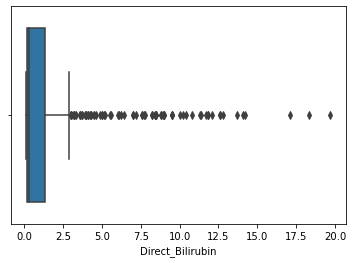

In [48]:
sns.boxplot(liver_df.Direct_Bilirubin)

In [49]:
liver_df.Direct_Bilirubin.sort_values(ascending=False).head()

559    19.7
531    18.3
504    17.1
259    14.2
505    14.1
Name: Direct_Bilirubin, dtype: float64

In [50]:
# Any direct bilirubin is a part of Total Bilirubin and constitutes of only 10% of the total bilirubin this is mostly negligable

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

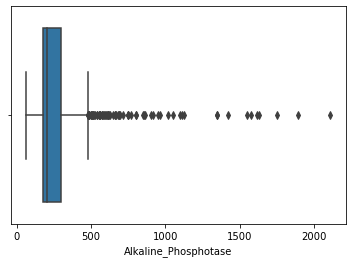

In [51]:
sns.boxplot(liver_df.Alkaline_Phosphotase)

In [52]:
# The ALP levels ranged from 1,005 to 3,067 IU/L so even this would not matter 

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

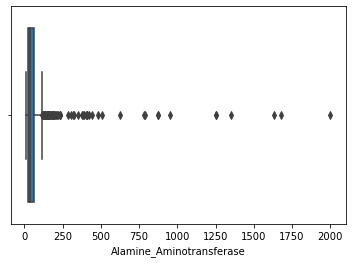

In [53]:
sns.boxplot(liver_df.Alamine_Aminotransferase)

In [54]:
# The measures of ALT can be  >1,000 IU/l thus the outliers can be considered and the difference between the outliers is neglegeble

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

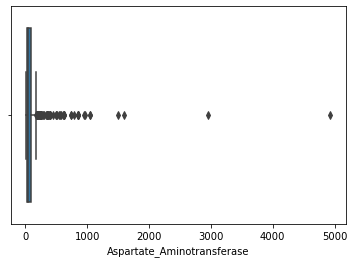

In [55]:
sns.boxplot(liver_df.Aspartate_Aminotransferase)

In [56]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head() # Here the difference of values is very high so we can eleminate some of the outliers

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

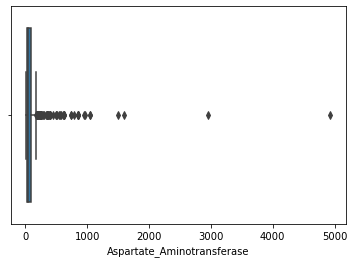

In [57]:
sns.boxplot(liver_df.Aspartate_Aminotransferase)

In [58]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head() # We can observe another outliers and this can also be elimated

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [59]:
# Hence we have eliminated two rows in outlier elimination of Aspartate_Aminotransferase

In [60]:
liver_df.shape

(583, 11)

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Protiens'>

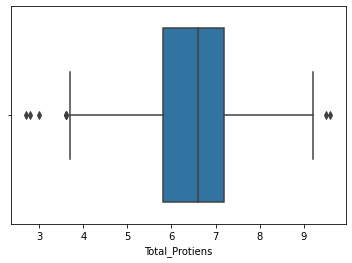

In [61]:
sns.boxplot(liver_df.Total_Protiens)

In [62]:
# These outliers will not create any hinderence to the model

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Albumin'>

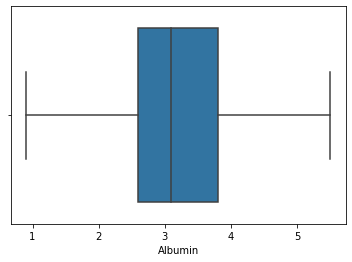

In [63]:
sns.boxplot(liver_df.Albumin)

In [64]:
# We can obsereve that there are no outliers present 

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

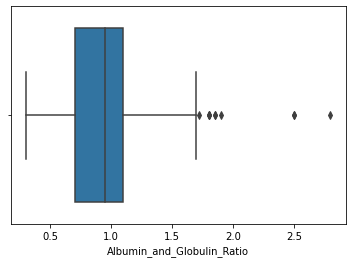

In [65]:
sns.boxplot(liver_df.Albumin_and_Globulin_Ratio)

In [66]:
# By this observation we can see that these outliers would not cause any hinderence to the model thus can be used

In [67]:
# Data Visualization

Text(0, 0.5, 'Frequency')

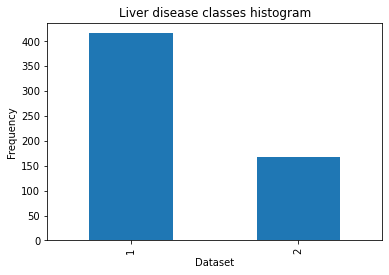

In [68]:
count_classes = pd.value_counts(liver_df['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [69]:
# 2- non liver patient and 1 is liver patient 

In [70]:
liver_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Number of patients that are male:  441
Number of patients that are female:  142


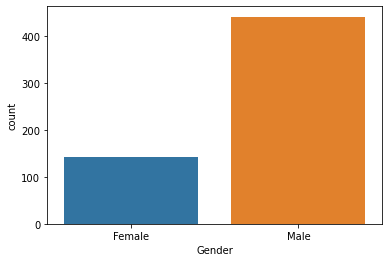

In [71]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


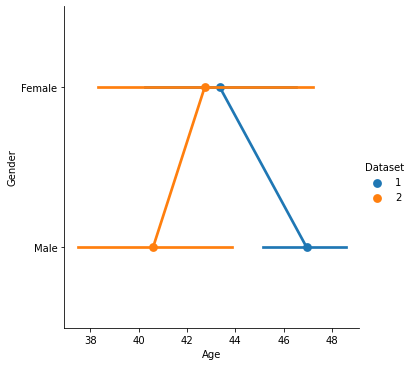

In [72]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=liver_df);

In [73]:
# Age seems to be a factor for liver disease for both male and female genders

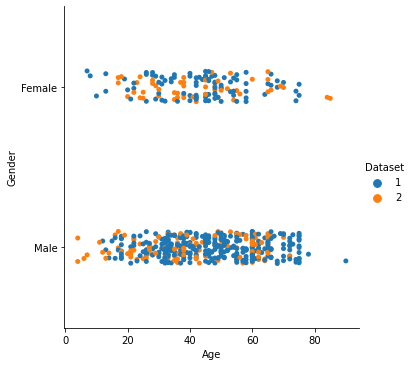

In [74]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

In [75]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=True)

,Dataset,Gender,Age
0,1,Female,43.347826
1,1,Male,46.950617
2,2,Female,42.740000
3,2,Male,40.598291


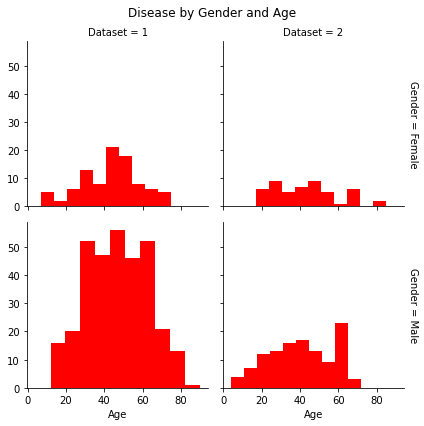

In [76]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [77]:
# So here we can clearly observe that at the age of 40 to 60 people diagnosed with liver disease is very high

In [78]:
# # # Feature Selection Observation

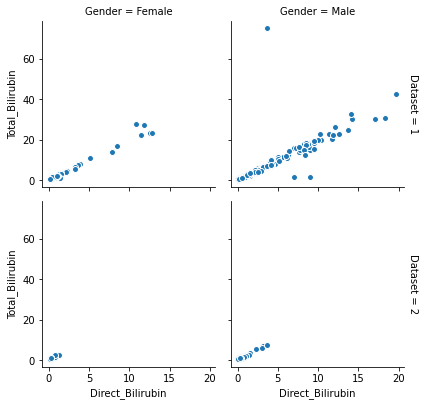

In [79]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [80]:
# In this scatter plot we can observe that all the values are in a linear line this shows that there is a direct relationship between both Direct and Total Bilirubin

In [81]:
# # # Feature Selection Start

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


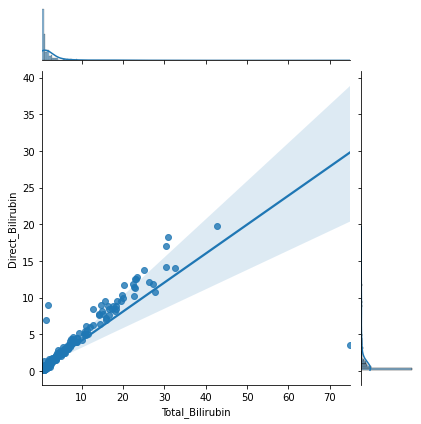

In [82]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

In [83]:
# Here we can almost observe a linear line which represents high similarity in both Direct and Total Bilirubin

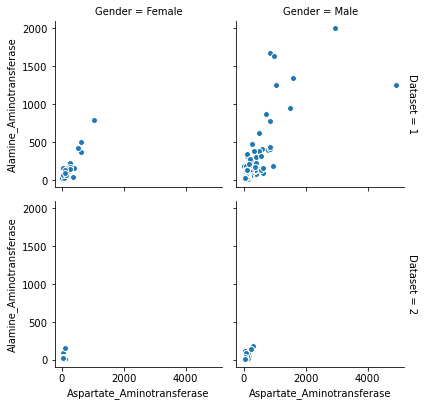

In [84]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [85]:
# There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. But not as much as Total and Direct Bilirubin

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


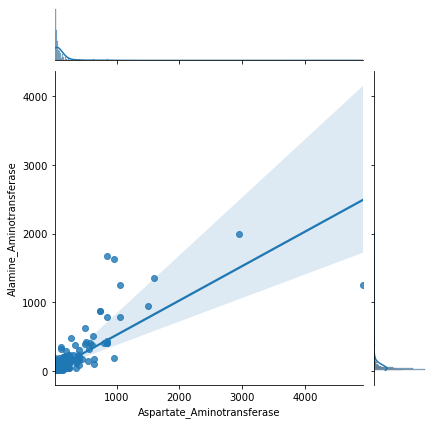

In [86]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

In [87]:
# The jointplot for Alamine_Aminotransferase and Aspartate_Aminotranferase shows lower linear relationship than expected

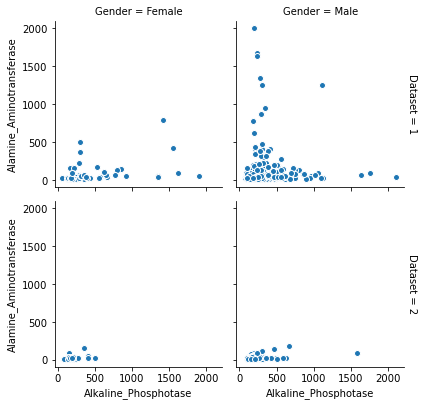

In [88]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [89]:
# To confirm if there is co-relation between Alamine_Aminotransferase and Alkaline_Phosphatase we such have a joint plot

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


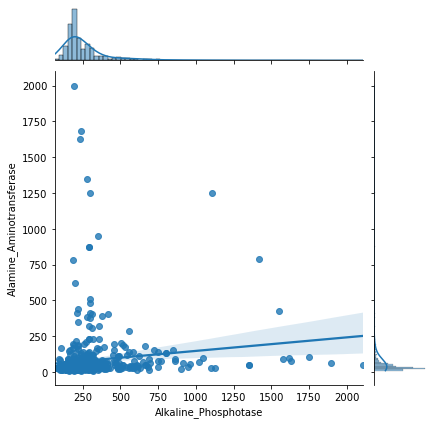

In [90]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

In [91]:
# The joinplot shows no linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

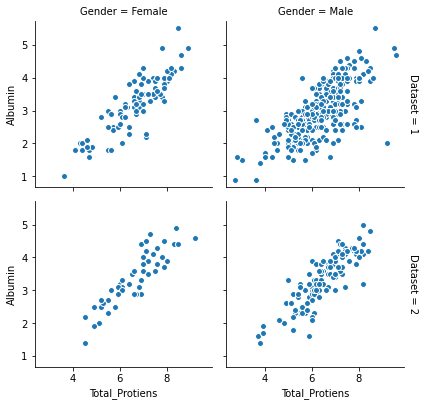

In [92]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [93]:
# There is linear relationship between Total_Protiens and Albumin and the gender. 

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


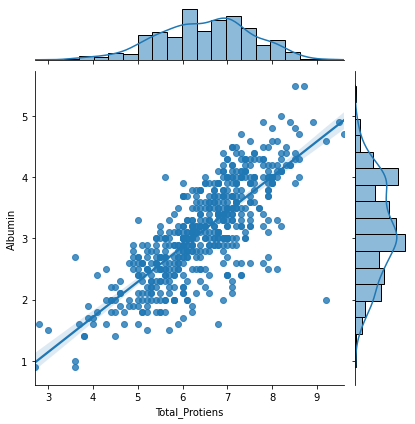

In [94]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

In [95]:
# There is a linear relationship and can be considered for dropping only under analysis 

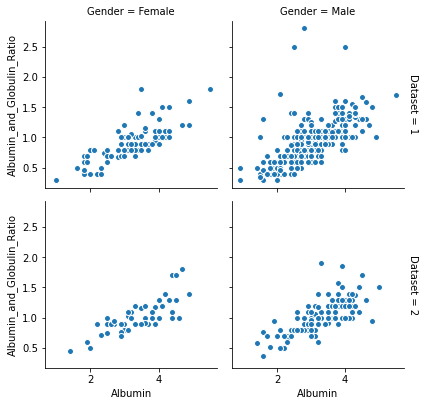

In [96]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [97]:
# There is linear relationship between Albumin_and_Globulin_Ratio and Albumin.

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


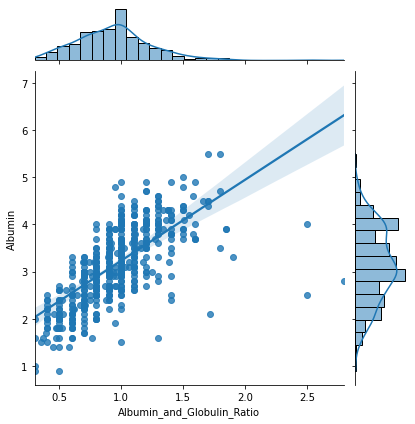

In [98]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

In [99]:
# Thus by this information we can observe that the jointplot has lesser linear relationship than showed in scatter plot 

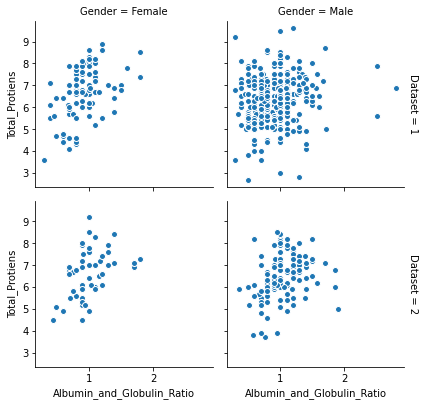

In [100]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


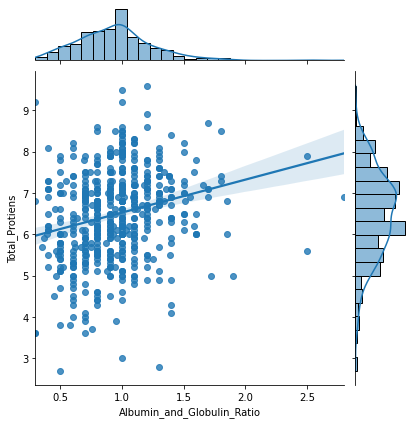

In [101]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data=liver_df, kind="reg")

In [102]:
# By this plot we can observe that the linear relationship is lower than expected.

In [103]:
# # Observation
#From the above jointplots and scatterplots, we find direct relationship between the following features:
#Direct_Bilirubin & Total_Bilirubin
#Aspartate_Aminotransferase & Alamine_Aminotransferase
#Total_Protiens & Albumin
#Albumin_and_Globulin_Ratio & Albumin
#Total_Protiens & Albumin_and_Globulin_Ratio

In [104]:
# # Label Encoding

In [105]:
# Have to remap the class labels for convenience, no liver disease then:=0 for patients having liver disease then:=1

In [106]:
liver_df['Dataset'] = liver_df['Dataset'].map({2:0,1:1})

In [107]:
liver_df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [108]:
# # Encoding -2  Male and Female

In [109]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [110]:
liver_df = binary_encode(liver_df, 'Gender', 'Male')

In [111]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [112]:
# 1 is male and 0 is female

In [113]:
# # Corelation

In [114]:
liver_df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


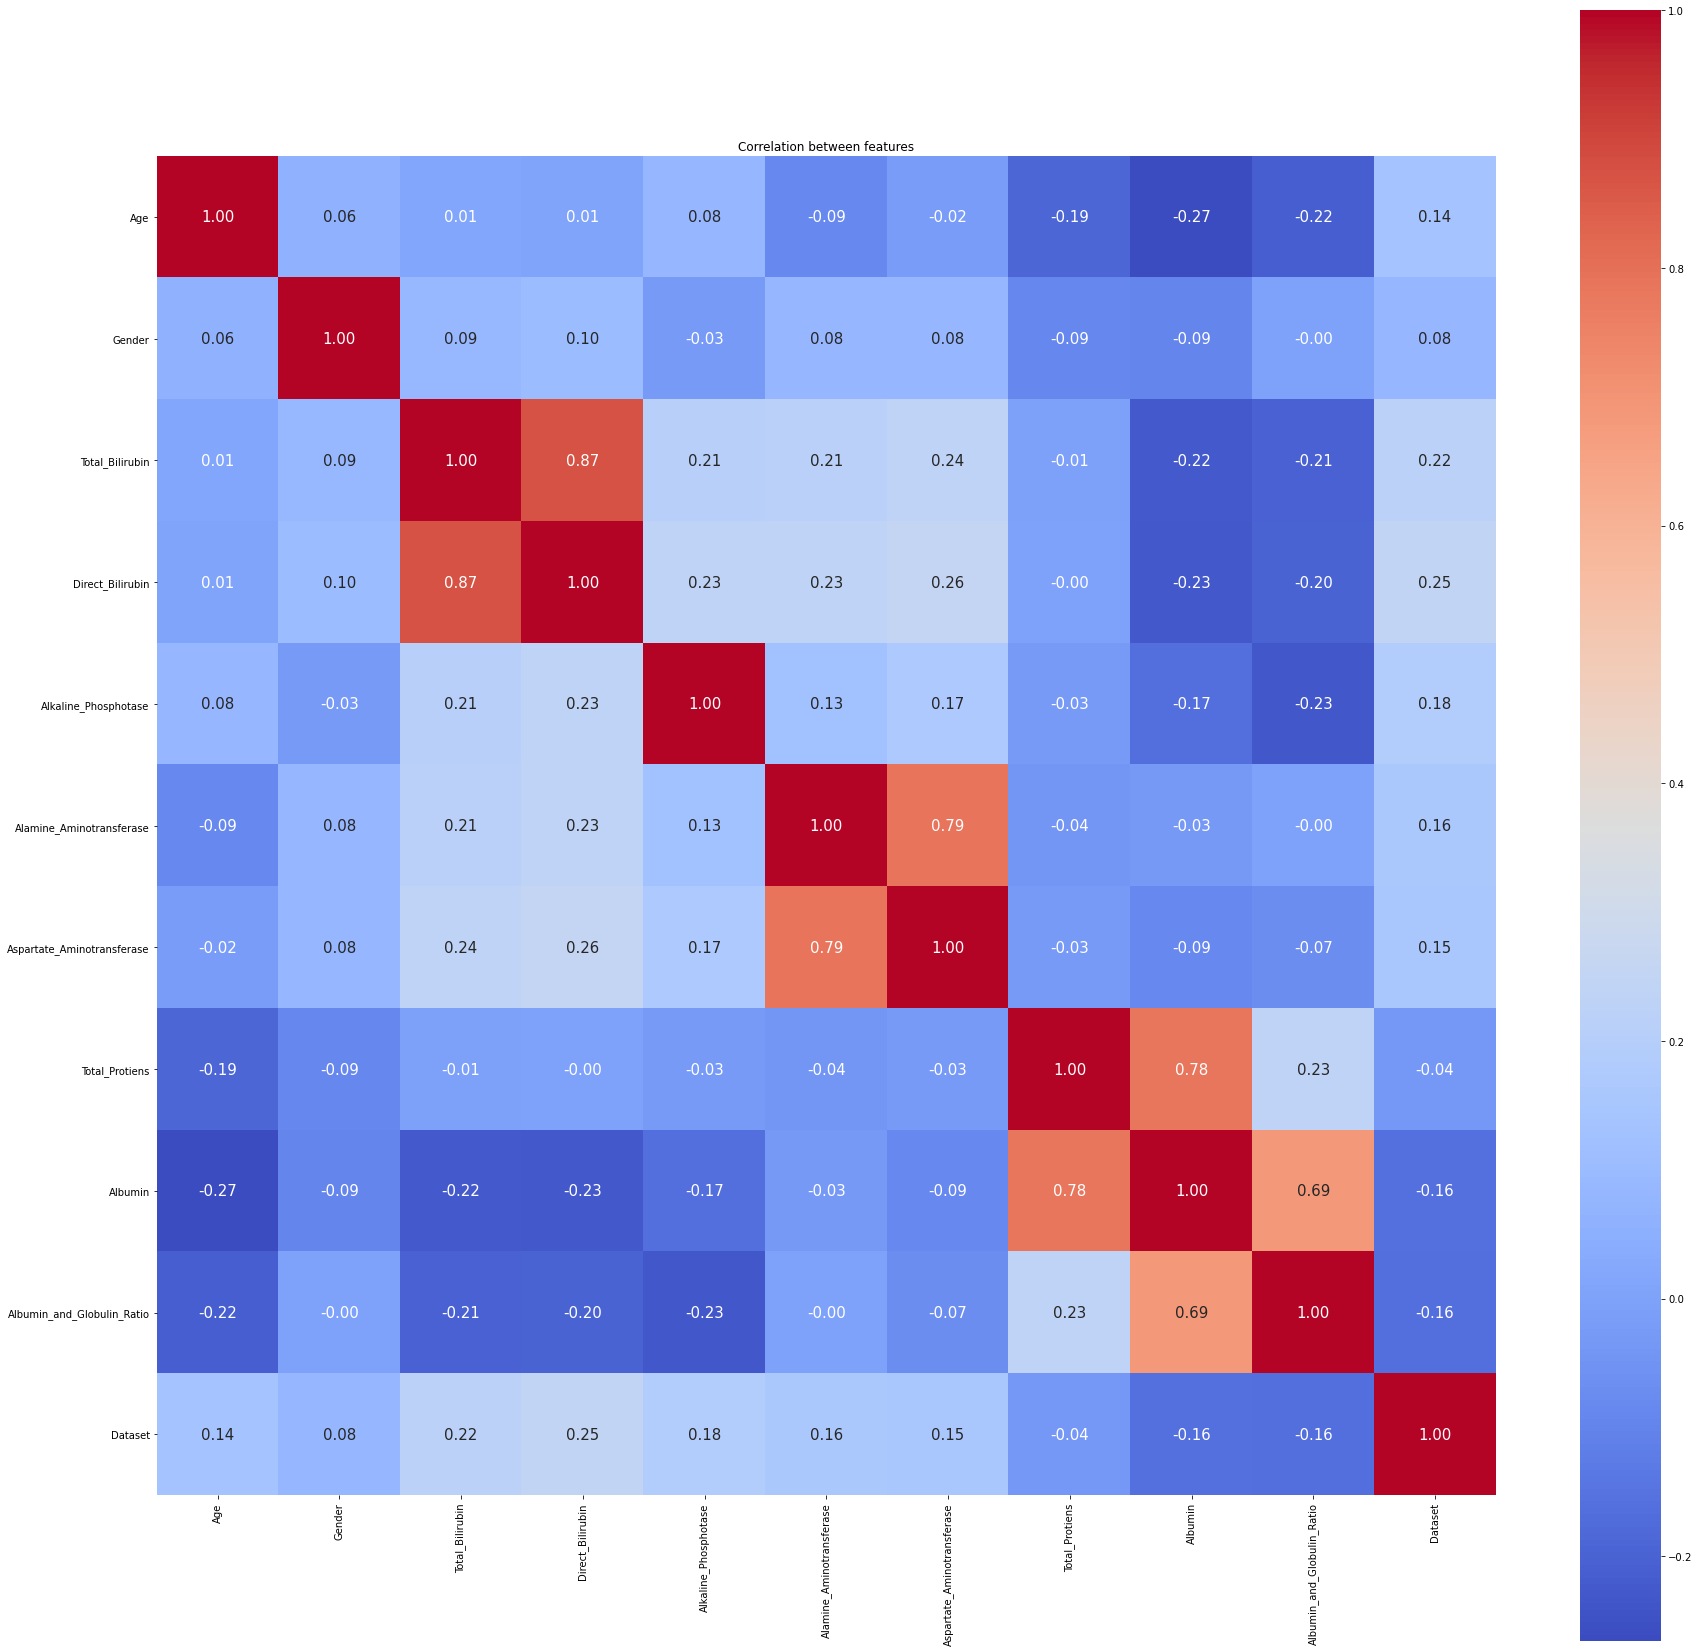

In [115]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [116]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [117]:
# Now train test split can be done directly or direct bilirubin can be dropped and then train test split can be done

In [118]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [119]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [121]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import keras.backend
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Preparation

In [125]:
from sklearn.model_selection import train_test_split

X = liver_df.iloc[:,:-1]
y = liver_df.Dataset

# The data is very imbalanced. So we are performing an 
# oversampling method to make our predictions more accurate

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=100)
X, y = ros.fit_resample(X, y)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=220)

# Machine Learning models 

In [127]:
# For measuring the accuracy of the models, we also import accuracy_score,
# classification_report, roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [128]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, C=2)
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

C:\Users\nitin\Anaconda3\envs\LDP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
print("Train Score:", log_reg.score(X_train, y_train))
print("Test Score:", log_reg.score(X_test, y_test))

Train Score: 0.6857142857142857
Test Score: 0.7065868263473054


In [130]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,70,18
1,31,48


In [131]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        88
           1       0.73      0.61      0.66        79

    accuracy                           0.71       167
   macro avg       0.71      0.70      0.70       167
weighted avg       0.71      0.71      0.70       167



In [181]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [182]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.7678365937859608


In [184]:
print(accuracy_score(y_test, log_reg.predict(X_test)))

0.7065868263473054


As we can see, logistic regression is not the best model for this classification and we may have to try with more complex algorithms

In [132]:
# Knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4,
                           weights='distance')
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [133]:
print("Train Score:", knn.score(X_train, y_train))
print("Test Score:", knn.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8143712574850299


In [134]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,86,2
1,29,50


In [135]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        88
           1       0.96      0.63      0.76        79

    accuracy                           0.81       167
   macro avg       0.85      0.81      0.81       167
weighted avg       0.85      0.81      0.81       167



In [136]:
import sklearn.metrics as metrics

In [137]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = knn.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [138]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9569907940161104


In [139]:
print(accuracy_score(y_test, y_predict))

0.8143712574850299


In [140]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=70, 
                             max_depth=30, min_samples_split=2)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

In [141]:
print("Train Score:", dtc.score(X_train, y_train))
print("Test Score:", dtc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8622754491017964


In [142]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,85,3
1,20,59


In [143]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        88
           1       0.95      0.75      0.84        79

    accuracy                           0.86       167
   macro avg       0.88      0.86      0.86       167
weighted avg       0.88      0.86      0.86       167



In [144]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = dtc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [145]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.8563722669735327


In [185]:
print(accuracy_score(y_test, dtc.predict(X_test)))

0.8622754491017964


In [146]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,
                             random_state=10, 
                             max_depth=100,)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

In [147]:
print("Train Score:", rfc.score(X_train, y_train))
print("Test Score:", rfc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9041916167664671


In [148]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,85,3
1,13,66


In [149]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict))

Confusion Matrix: 
 [[85  3]
 [13 66]]


In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.96      0.84      0.89        79

    accuracy                           0.90       167
   macro avg       0.91      0.90      0.90       167
weighted avg       0.91      0.90      0.90       167



In [151]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [152]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9792146144994246


In [153]:
print(accuracy_score(y_test, y_predict))

0.9041916167664671


In [154]:
#Random Forest has reached the highest accuracy till now 

In [155]:
#SVC 
from sklearn.svm import SVC
from sklearn import svm

svc = SVC(C=19, gamma=0.010, random_state=60,
          probability=True) 
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

In [156]:
print("Train Score:", svc.score(X_train, y_train))
print("Test Score:", svc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9341317365269461


In [157]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,84,4
1,7,72


In [158]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        88
           1       0.95      0.91      0.93        79

    accuracy                           0.93       167
   macro avg       0.94      0.93      0.93       167
weighted avg       0.93      0.93      0.93       167



In [159]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = svc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [160]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9608745684695053


In [161]:
print(accuracy_score(y_test, y_predict))

0.9341317365269461


In [162]:
svm_classifier = SVC(C=19, gamma=0.010, random_state=60,
          probability=True)
svm_classifier.fit(X_train, y_train)

svm_y_pred = svm_classifier.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_y_pred
                         )
print('Confusion Matrix: \n', confusion_matrix(y_test,svm_y_pred))
print(accuracy_score(y_test, svm_y_pred))
accuracy=accuracy_score(y_test,svm_y_pred)
print(precision_score(y_test, svm_y_pred))

Confusion Matrix: 
 [[84  4]
 [ 7 72]]
0.9341317365269461
0.9473684210526315


In [170]:
## Predict Train results
y_train_pred = svm_classifier.predict(X_train)


In [172]:
## Predict Test results
y_pred = svm_classifier.predict(X_test)

In [173]:
confusion_matrix(y_test, y_pred).T

array([[84,  7],
       [ 4, 72]], dtype=int64)

In [175]:
y_pred_proba = svm_classifier.predict_proba(X_test)[:,1]

In [176]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


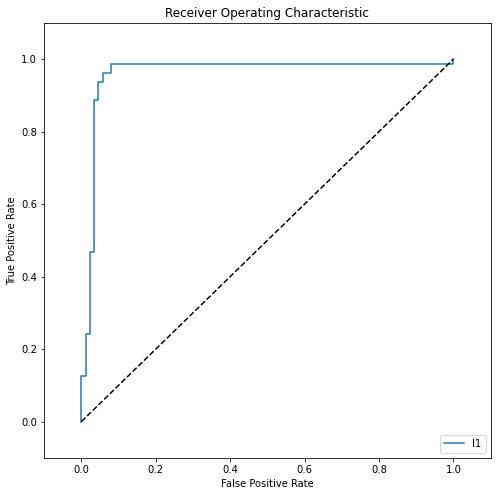

In [177]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [178]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [180]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
print(auc(fpr, tpr))

0.9608745684695053


In [186]:
import pickle 
pickle.dump(svm_classifier, open('model1.pkl','wb'))